# About Dataset
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.



- Item_Identifier - Unique Product ID
- Item_Weight - Weight of product
- Item_Fat_Content - Whether the product is low fat or not
- Item_Visibility - The % of total display area of all similar products in a store
- Item_Type - Product Category
- Item_MRP - Maximum Retail Price for a Product
- Outlet_Identifier - Unique store ID
- Outlet_Establishment_Year - The year in which store was established
- Outlet_Size - The size of the store (Area Size Category)
- Outlet_Location_Type - The type of city in which the store is located
- Outlet_Type - Grocery store or a type of supermarket
- Item_Outlet_Sales - Sales of the product in the particular store (Ground truth)

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
# reading first 5 columns from our dataset 
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Shape of the dataset
df.shape

(8523, 12)

In [6]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observation:
   - count of values for Item_Weight column is lesser compare to others.

In [7]:
# checking no of unique values in dataset
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Data Cleaning

In [8]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observation:
   - There are missing values in Item_Weight, Outlet_Size columns.

In [9]:
# check for categorical attributes
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# removing 2 as there will repeating values for these 2 columns
categorical_cols.remove('Item_Identifier')
categorical_cols.remove('Outlet_Identifier')
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# printing the categorical columns data details and it's frequency
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

Observation:
   - As we can see in Item_Fat_Content column Low Fat repeating as values such as LF, low fat, and Regular -> reg

In [12]:
# filling the missing values for Item_Weight
# calculating mean based on Item_Identifier

item_weight_mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean  # for the corresponding Item_Identifier we got Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
# Onty selecting these rows where we have missing values 
missing_values = df['Item_Weight'].isnull()
missing_values 

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
# we are filling missing values in Item_Weight with corresponding 'Item_Identifier'
for i, item in enumerate(df['Item_Identifier']):
    if missing_values[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [15]:
# confirming changes
df['Item_Weight'].isnull().sum() # done

0

In [16]:
# filling missing values inside outlet_size

# will fill it based on Outlet_Type -> since it's a categorical variable we are using mean

outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
# we got all the rows where values are missing
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [18]:
# we are filling missing values
df.loc[missing_values , 'Outlet_Size'] = df.loc[missing_values , 'Outlet_Type'].apply(lambda x : outlet_size_mode[x])

In [19]:
# confirming changes
df['Outlet_Size'].isnull().sum() # done

0

In [20]:
# Checking in Item_Visibility column how many 0 values we got
sum(df['Item_Visibility'] == 0)

526

In [21]:
# replacing 0 with mean values
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [22]:
# onfirming changes
sum(df['Item_Visibility'] == 0)  # done

0

In [23]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'})

In [24]:
# confirming changes
df['Item_Fat_Content'].value_counts()   # done

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [25]:
# final data overview
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
# A concise Summary of statist
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,2181.288914
std,4.226124,0.048742,62.275067,1706.499616
min,4.555000,0.003575,31.290000,33.290000
25%,9.310000,0.033085,93.826500,834.247400
50%,12.857645,0.062517,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Univariate Analysis

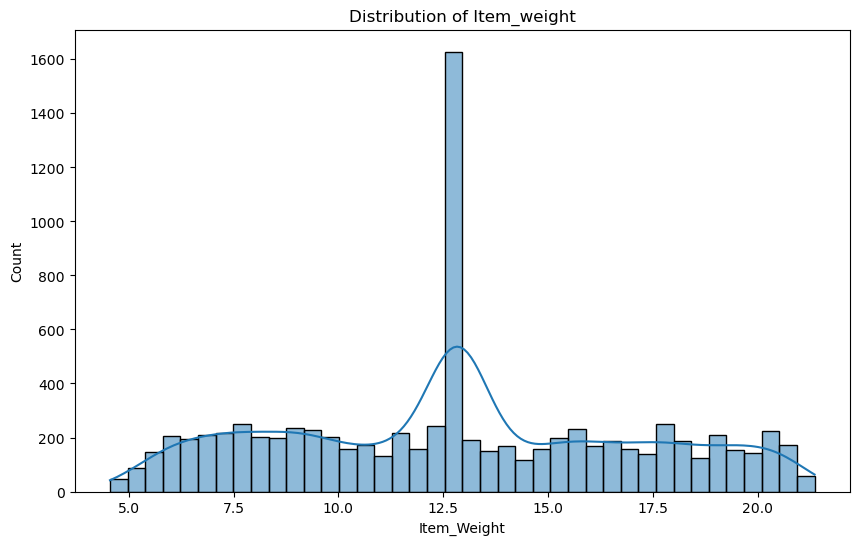

In [44]:
# Distribution of Item_weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Weight'], bins=40, kde=True)
plt.title('Distribution of Item_weight')
plt.show()

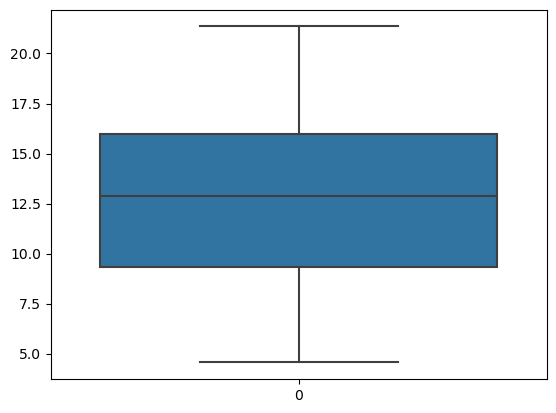

In [28]:
# checking for outliers
sns.boxplot(df['Item_Weight'])
plt.show()

Note:- 
  - we not observe any useful pattern from this histogram plotted b/w item weight and its count.
  - we only notice that item with approx 12 kg wait is high in number.
  - As we filled most of missing values with mean thats why we can see item mean value is higher.

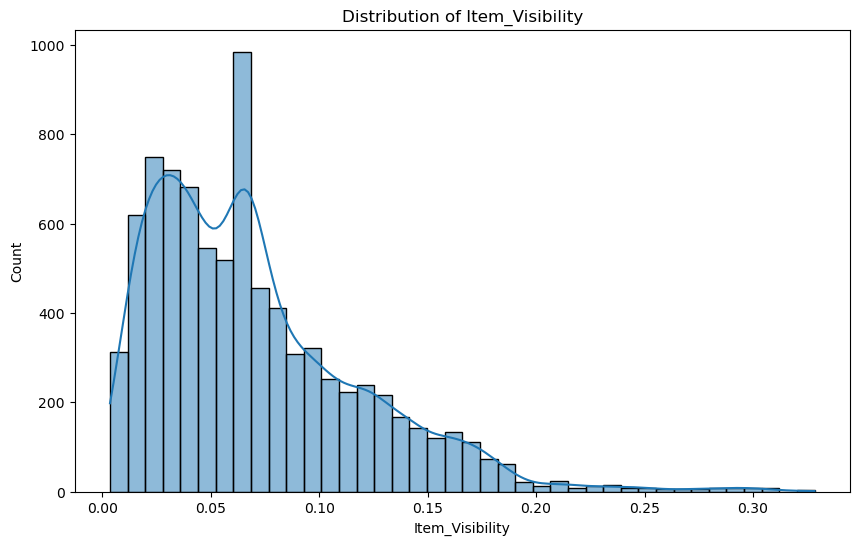

In [47]:
# Data distribution for Item_Visibility column
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Visibility'], bins=40, kde=True)
plt.title('Distribution of Item_Visibility')
plt.show()

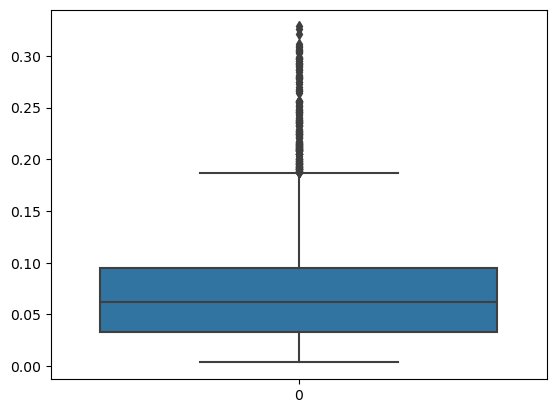

In [30]:
# checking for outliers
sns.boxplot(df['Item_Visibility'])
plt.show()

Note:-
  - As we see Item_Visibility is right-skewed and should be transformed to curve its skewness. 
  - We have seen earlier more number of item have zero visibility which is not possible at all,bcoz if the item is present in store then its visibility    can't be zero thats why during cleaning we replaced it with the mean data.

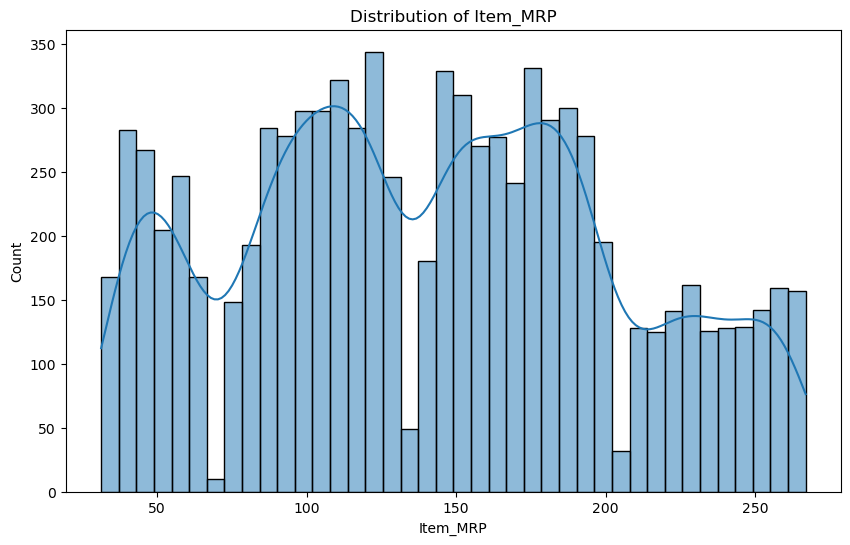

In [48]:
# Data distribution for Item_MRP column
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_MRP'], bins=40, kde=True)
plt.title('Distribution of Item_MRP')
plt.show()

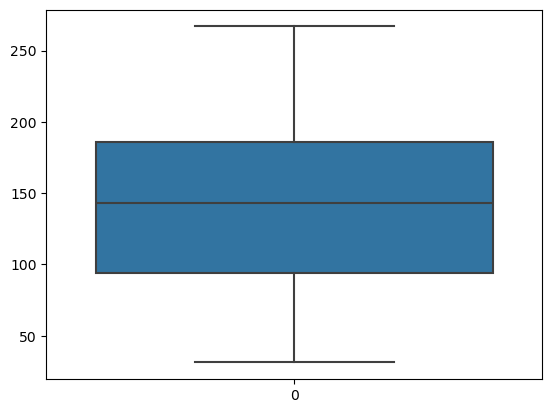

In [32]:
# checking for outliers
sns.boxplot(df['Item_MRP'])
plt.show()

Note:-
  - There is a four different patterens of item price we see which will help us in feature processing.
  - we also notice high rate items are less in number.
  - average rate items are more in number.


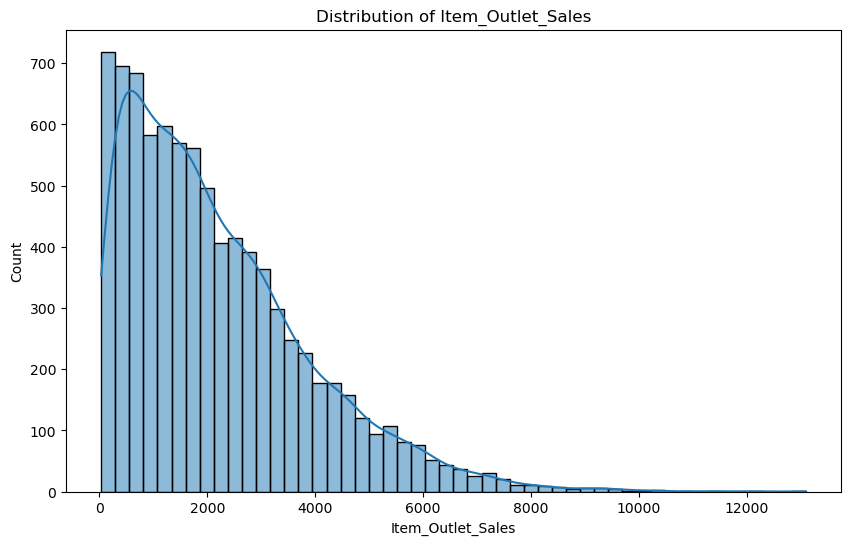

In [49]:
# Data distribution for Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=50, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

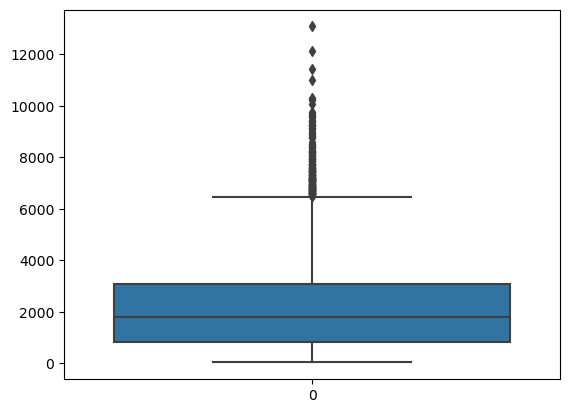

In [34]:
# checking for outliers
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()

Note:-
- Since our target variable is continuous, we can visualise it by plotting its histogram. As you can see, it is a right skewed variable and would needs some data transformation to treat its skewness and outliers.

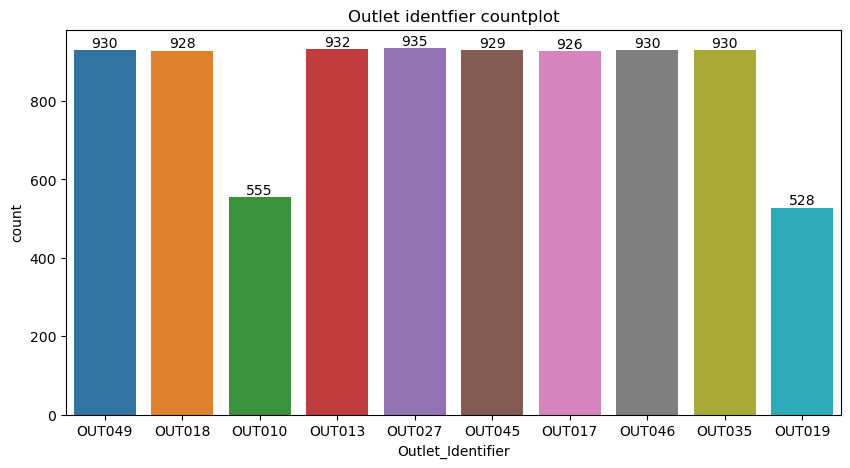

In [61]:
# countplot for Outlet_Identifier
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Outlet_Identifier',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Outlet identfier countplot')
plt.show()

Note:- 
 - There is no useful pattern extracted for prediction. 
 - All the outlet are equal but only the out10 and out19 which have lesser amount of items in each other.                                      

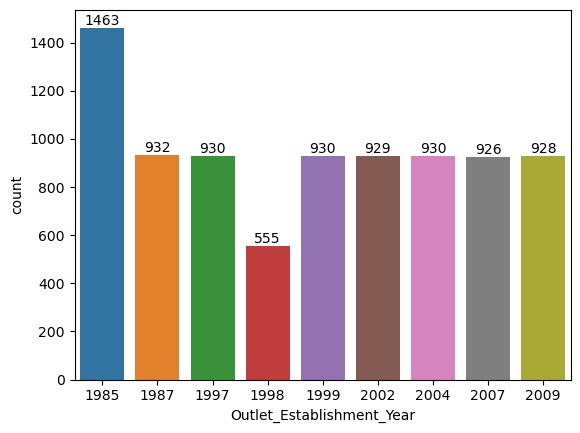

In [35]:
# countplot for Outlet_Establishment_Year
ax = sns.countplot(x = df['Outlet_Establishment_Year'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

In [63]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Note:-
 -  Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
 -  higher number of observation in the data for the outlet established year 1999.
 -  The oldest store has opened in 1985 and the newest one has opened in 2009. when we look at mean and median,we can say stores in dataset are     generally old stores. (More than 17-18 years old.)

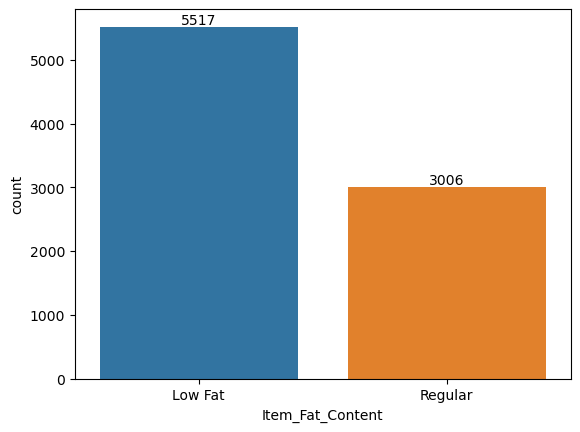

In [36]:
# countplot for Item_Fat_Content
ax = sns.countplot(x = df['Item_Fat_Content'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Note:-
  - Sales for low fat item are more in number.
  - Sales for regular fat items are lesser.

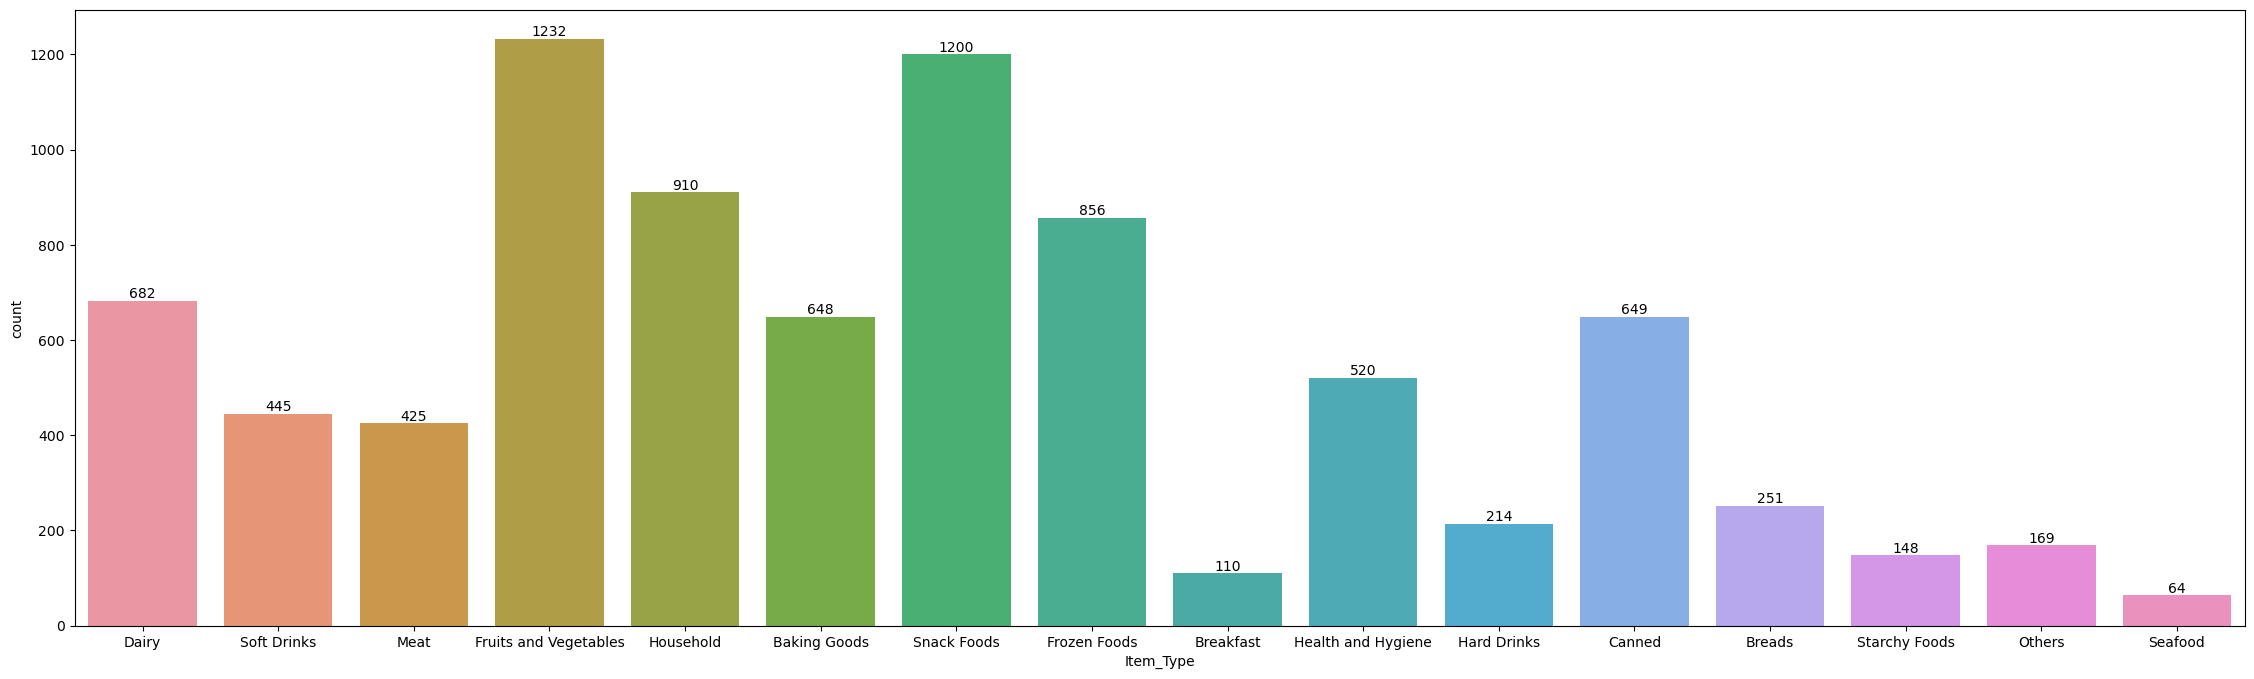

In [37]:
# countplot for Item_Type
plt.figure(figsize = (28,8))
ax = sns.countplot(x = df['Item_Type'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Observations:-
- Sales of fruits and vegetables is highest among all the item types.
- Snack Foods and Household second and third most desirable items.
- on the other hand Sales of seafood is lowest among all categories.

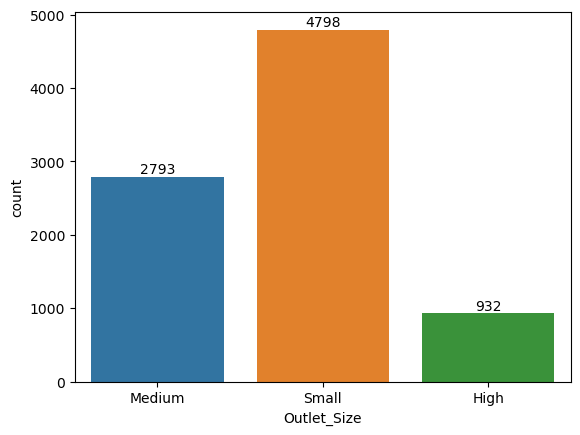

In [38]:
# countplot for Outlet_Size
ax = sns.countplot(x = df['Outlet_Size'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Observations:-
- we can see small size outlet are more in number.
- we also notice medium size outlet are second highest in number.
- But the high size outlet ae less in number

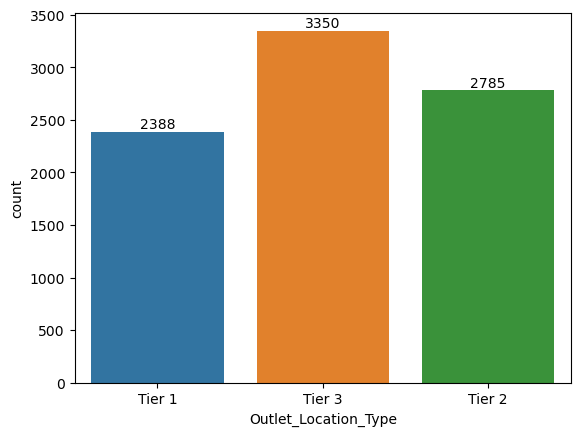

In [39]:
# countplot for Outlet_Location_Type
ax = sns.countplot(x = df['Outlet_Location_Type'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Observations:-
- The type of city in which the store is located is tells by this tiers.
- Tier3 type store have more collection of item followed by Tier2 and Tier1.

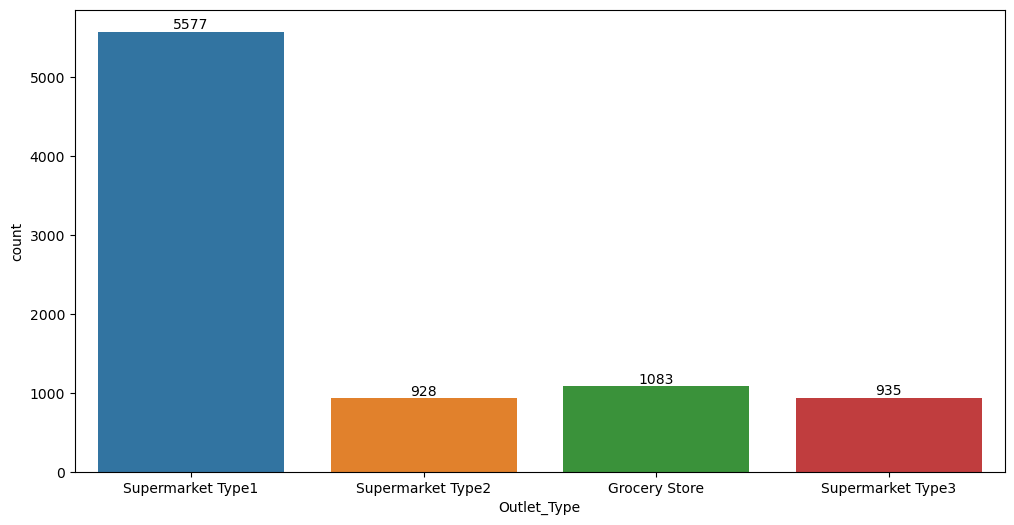

In [40]:
# countplot for Outlet_Type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = df['Outlet_Type'], data = df)

# for count lables 
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Observations:-
- We can see supermarket type 3 is more as compared to other.
- if we compare other left types then grocery store is high as compared to other supermarkets.
- Supermarket Type 1 seems to be the most popular category of Outlet_Type.

# Bivariate Analysis
The Item_Outlet_Sales is our main feature of interest in this dataset.which can help to bulid model which can predict their values efficiently.

In [65]:
df.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


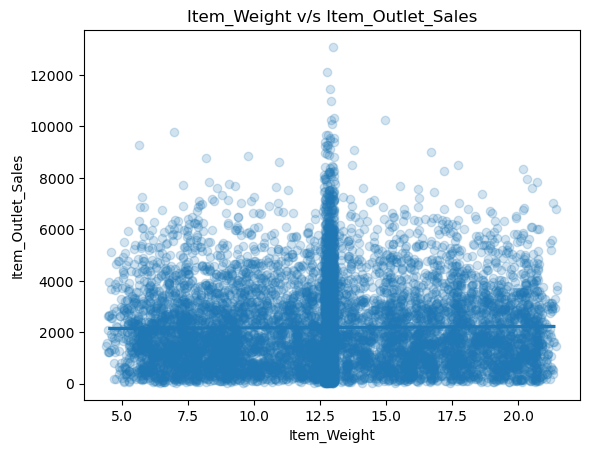

In [68]:
# Analysis on Item Weight v/s item outlet sales

sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,x_jitter=0.2,scatter_kws={'alpha':0.2})
plt.title("Item_Weight v/s Item_Outlet_Sales")
plt.show()

Note:- 
 - NO USEFUL pattern extracted from this.
 - we can say item weight is less importtant for item outlet sales.
 - Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

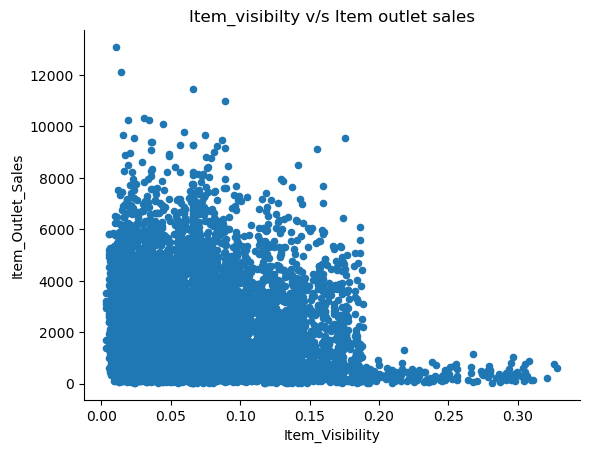

In [69]:
#  Analysis on Item_visibilty v/s Item outlet sales

df.plot.scatter(x='Item_Visibility' ,y='Item_Outlet_Sales').set(title='Item_visibilty v/s Item outlet sales',
      xlabel='Item_Visibility',
      ylabel='Item_Outlet_Sales')
sns.despine()

Note:- 
 - As we see Item_Visibility is right-skewed and should be transformed to curve its skewness. 


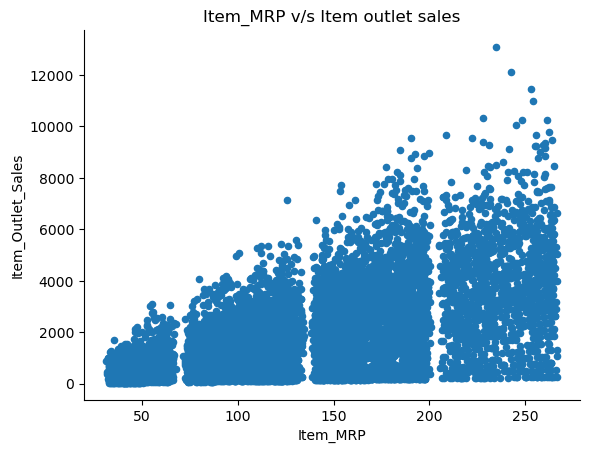

In [72]:
# Analysis on Item_MRP v/s Item outlet sales

df.plot.scatter(x='Item_MRP' ,y='Item_Outlet_Sales').set(title='Item_MRP v/s Item outlet sales',
      xlabel='Item_MRP',
      ylabel='Item_Outlet_Sales')
sns.despine()

Note:- 
 - we can notice increase in the MRP outlet sales increases.

# Finding the squareroot of item outlet sales column

In [75]:
df['outlet_sales_sqrt']=df['Item_Outlet_Sales'].apply(np.sqrt)

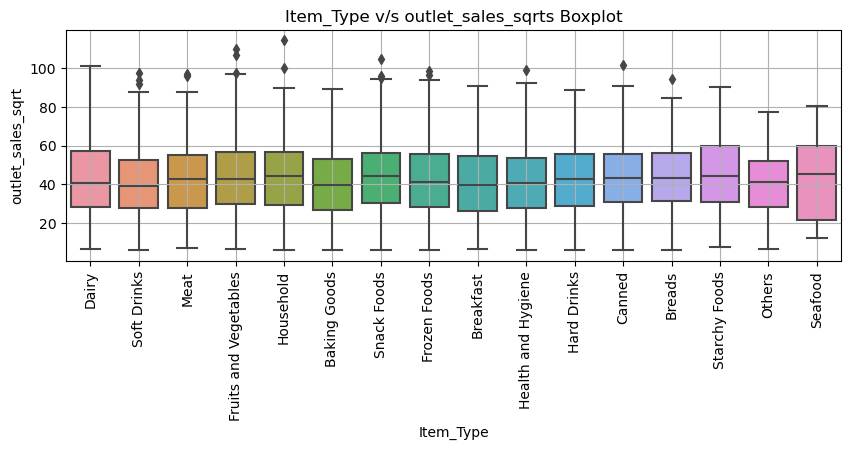

In [76]:
# Analysis on Item_Type v/s outlet_sales_sqrts 

plt.figure(figsize=(10,3))
sns.boxplot(x='Item_Type',y='outlet_sales_sqrt',data=df)
plt.title("Item_Type v/s outlet_sales_sqrts Boxplot")
N=16
ind=np.arange(N)
s=(df['Item_Type'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.grid()
plt.show()

Note:- 
 - Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.

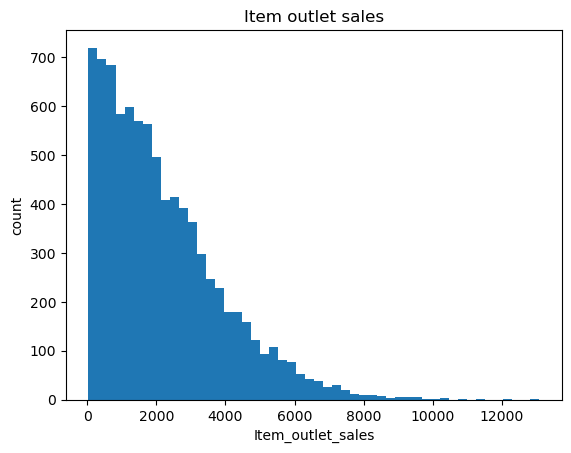

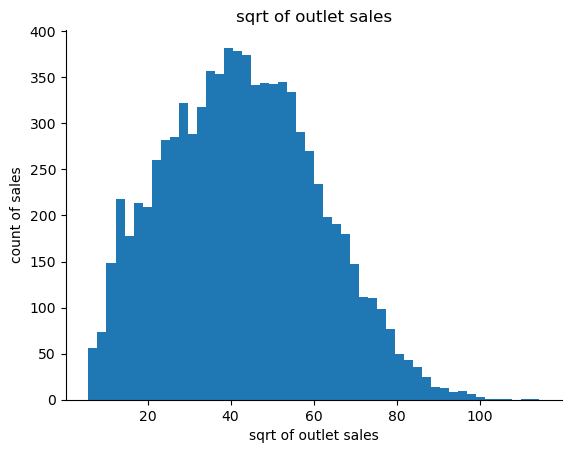

In [77]:
# Analysis on Item_Outle_Sales vs SQRT of Outlate_sales

plt.hist(df['Item_Outlet_Sales'],bins=50)
plt.title('Item outlet sales')
plt.xlabel('Item_outlet_sales')
plt.ylabel('count')
plt.show()
plt.hist(df['outlet_sales_sqrt'],bins=50)
plt.title('sqrt of outlet sales')
plt.xlabel('sqrt of outlet sales')
plt.ylabel('count of sales')
sns.despine()

Note:-
 - Observing the histogram of Item Outlet Sales for looking of sales distribution. Also, the histogram of Item Outlet Sales with sqrt, so we can decide which one is more close to normal distribution. As conclusion, we can say SQRT of Item Outlet Sales is much more normal than the others.

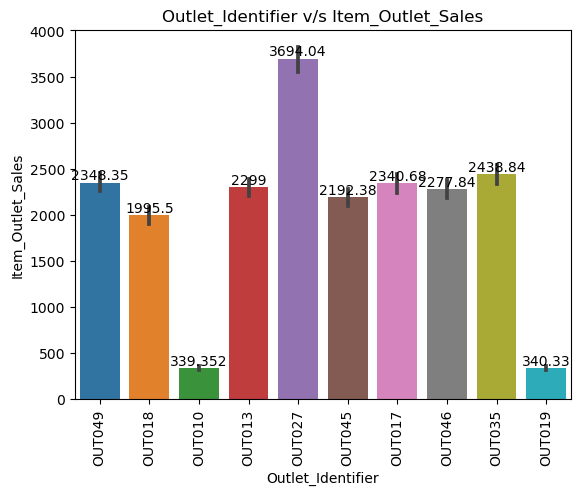

In [80]:
# Outlet_Identifier v/s Item_Outlet_Sales 

ax = sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
N=10
ind=np.arange(N)
plt.title("Outlet_Identifier v/s Item_Outlet_Sales")
s=(df['Outlet_Identifier'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

Note:- 
 - The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

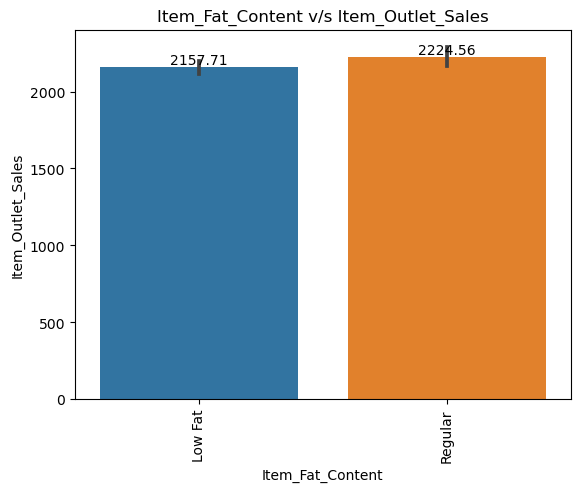

In [83]:
# Analysis on Item_Fat_Content v/s Item_Outlet_Sales

ax = sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
N=2
plt.title("Item_Fat_Content v/s Item_Outlet_Sales")
ind=np.arange(N)
s=(df['Item_Fat_Content'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

Note:- 
 - Distribution of Item_Outlet_Sales across the categories of Item_Fat_Content is not very distinct.

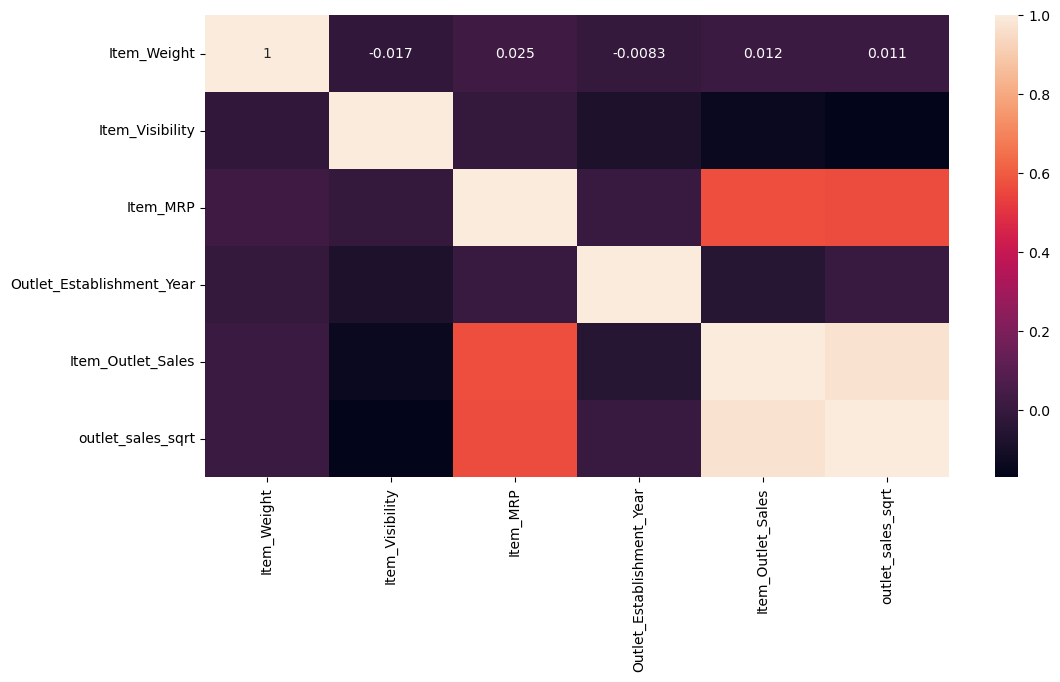

In [84]:
# finding the correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Note:- 
 - Item MRP is corelated to Item_otlet_sales and Outlet_sales_Sqrt. 

# Let’s summarize the key insights from Analysis Of Big Mart Sales Prediction:

- Item Weight and Count:
    - The histogram of item weight and its count doesn’t reveal any useful patterns.
    - However, you noticed that items with an approximate weight of 12 kg are more common.
    - The higher mean value of item weight may be due to filling missing values with the mean. 

- Item Visibility: 
    - Item visibility is right-skewed and should be transformed to address skewness. 
    - we replaced zero visibility values (which were not possible) with the mean during data cleaning. 

- Item Price Patterns: 
    - There are four distinct price patterns, which will be useful for feature processing. 
    - High-rate items are less common, while average-rate items dominate.  

- Target Variable (Item Outlet Sales):
    - The sales distribution is right-skewed, requiring data transformation to handle skewness and outliers. 

- Outlet Characteristics:
  - Outlets OUT010 and OUT019 have fewer items compared to others.
  - Outlets established in 1998 have fewer observations, while those established in 1999 have more.
  - The dataset includes both old and newer stores.

- Item Fat Content:
    - Sales are higher for low-fat items and lower for regular-fat items.

- Item Types:
    - Fruits and vegetables have the highest sales, followed by snack foods and household items.
    - Seafood has the lowest sales.

- Outlet Sizes:
    - Small-sized outlets are more common, followed by medium-sized outlets.
    - High-sized outlets are less common.

- City Tiers and Outlet Types:
    - Tier 3 stores have the most extensive item collections, followed by Tier 2 and Tier 1.
    - Tier 3 stores have the most extensive item collections, followed by Tier 2 and Tier 1.

- Item Weight vs. Outlet Sales:
    - No clear pattern exists between item weight and outlet sales.

- Item Visibility vs. Outlet Sales:
    - Item visibility transformation is necessary due to skewness.

- MRP and Outlet Sales:
    - There’s a positive correlation between item MRP and outlet sales.

# Thank You